In [2]:
# imports

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data into dataframe

pam_health_csv_file_path = Path('data/pam-health-ticket-data.csv')

pam_health_raw = pd.read_csv(pam_health_csv_file_path)

In [4]:
pam_health_raw

,number,opened_at,caller_id,location,short_description,priority,state,assignment_group,assigned_to,sys_updated_on,description,category,u_category_1,u_sub_category_2,subcategory,Filter_Assignment_Group,Filter_Sys_Updated_On
0,INC0137206,5/1/2024 10:58,NaN,NaN,AIROS Password Reset,4 - Low,New,Non-Pam - AIROS Triage Tickets,NaN,5/1/2024 10:58,Password reset for AIROS/Kodiak.,Inquiry / Help,AIROS API,AIROS Triage,NaN,Non-Pam - AIROS Triage Tickets,5/1/2024 10:58
1,INC0137224,5/1/2024 11:54,Matthew Joseph,PAM Health Rehabilitation Hospital of Orange City,Asking for Update,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/1/2024 12:09,INC0247209,Inquiry / Help,AIROS API,AIROS Triage,NaN,AIROS SD Support,5/1/2024 12:09
2,INC0137236,5/1/2024 12:17,Kristyn Edwards,Post Acute Medical Specialty Hospital of Shrev...,expired password reset,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/1/2024 12:31,NaN,Inquiry / Help,AIROS API,AIROS Triage,NaN,AIROS SD Support,5/1/2024 12:31
3,INC0137111,5/1/2024 0:52,Pam Triage,Post Acute Medical Corporate,Wellsky Account Locked,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/2/2024 1:00,USERID: KWHITE04,Inquiry / Help,AIROS API,AIROS Triage,NaN,AIROS SD Support,5/2/2024 1:00
4,INC0137110,5/1/2024 0:22,NaN,Post Acute Medical Specialty Hospital of Covin...,New MFA Method Enrollment,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/2/2024 1:00,NaN,Inquiry / Help,AIROS API,AIROS Triage,NaN,AIROS SD Support,5/2/2024 1:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89673,INC0227707,5/30/2025 21:39,Michael Bannister,Post Acute Medical Rehabilitation Hospital of ...,WellSky account unlock,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/31/2025 22:00,User called in about a locked WellSky account.,Inquiry / Help,Application,Clinical Applications,NaN,AIROS SD Support,5/31/2025 22:00
89674,INC0227713,5/30/2025 22:18,Kia Thomas,Post Acute Medical Rehabilitation Hospital of ...,AIROS MFA setup,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/31/2025 23:00,User is calling in for assistance setting up t...,Inquiry / Help,Software,Password/Security,NaN,AIROS SD Support,5/31/2025 23:00
89675,INC0227715,5/30/2025 22:28,Nicole Budka,Post Acute Medical Specialty Hospital of New B...,AIROS Password Reset,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/31/2025 23:00,NaN,Inquiry / Help,Application,Password/Security,NaN,AIROS SD Support,5/31/2025 23:00
89676,INC0227714,5/30/2025 22:28,Pam Triage,Post Acute Medical Corporate,Wellsky Specialty Unlock,4 - Low,Closed,AIROS SD Support,Tech2 AIROS,5/31/2025 23:00,USERID: NBUDKA,Inquiry / Help,Application,Password/Security,NaN,AIROS SD Support,5/31/2025 23:00


In [5]:
# --- 1. Initial Data Inspection ---
print("--- Initial Data Overview ---")
print("Original DataFrame 'pam_health_raw' shape:", pam_health_raw.shape)
print("\nData Types and Non-Null Counts:")
pam_health_raw.info()

--- Initial Data Overview ---
Original DataFrame 'pam_health_raw' shape: (89678, 17)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89678 entries, 0 to 89677
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number                   89678 non-null  object 
 1   opened_at                89678 non-null  object 
 2   caller_id                79857 non-null  object 
 3   location                 83206 non-null  object 
 4   short_description        89669 non-null  object 
 5   priority                 89678 non-null  object 
 6   state                    89678 non-null  object 
 7   assignment_group         89674 non-null  object 
 8   assigned_to              87997 non-null  object 
 9   sys_updated_on           89678 non-null  object 
 10  description              34269 non-null  object 
 11  category                 89678 non-null  object 
 12  u_category_1

In [6]:
# --- 2. Column Selection for Classification Task ---
# Based on the goal, we only need the text description, the categories, and the final assignment group.
columns_to_keep = [
    'short_description',
    'description',
    'u_category_1',
    'u_sub_category_2',
    'assignment_group'
]

# Create a new DataFrame for cleaning and modeling
pam_health_cleaned_df = pam_health_raw[columns_to_keep].copy()

print("\n--- Column Selection ---")
print(f"Dropped {len(pam_health_raw.columns) - len(pam_health_cleaned_df.columns)} irrelevant columns.")
print("Selected DataFrame 'pam_health_cleaned_df' shape:", pam_health_cleaned_df.shape)
print("\nColumns kept for modeling:", pam_health_cleaned_df.columns.tolist())


--- Column Selection ---
Dropped 12 irrelevant columns.
Selected DataFrame 'pam_health_cleaned_df' shape: (89678, 5)

Columns kept for modeling: ['short_description', 'description', 'u_category_1', 'u_sub_category_2', 'assignment_group']


In [7]:
# --- 3. Data Cleaning & Preprocessing ---
print("\n--- Data Cleaning ---")

# Check for missing values before cleaning
print("\nMissing values before cleaning:")
print(pam_health_cleaned_df.isnull().sum())

# Rule 1: A ticket is useless without a short description. Drop these rows.
pam_health_cleaned_df.dropna(subset=['short_description'], inplace=True)

# Rule 2: We can't train a model if the target labels are missing.
# For this task, all three are targets at different stages.
pam_health_cleaned_df.dropna(subset=['u_category_1', 'u_sub_category_2', 'assignment_group'], inplace=True)

print("\nMissing values after cleaning:")
print(pam_health_cleaned_df.isnull().sum())
print("\nShape after removing nulls:", pam_health_cleaned_df.shape)

# Check for and remove any full duplicate rows
duplicates_before = pam_health_cleaned_df.duplicated().sum()
pam_health_cleaned_df.drop_duplicates(inplace=True)
print(f"\nRemoved {duplicates_before} duplicate rows.")
print("Final cleaned DataFrame shape:", pam_health_cleaned_df.shape)


--- Data Cleaning ---

Missing values before cleaning:
short_description        9
description          55409
u_category_1          1425
u_sub_category_2      1461
assignment_group         4
dtype: int64

Missing values after cleaning:
short_description        0
description          55095
u_category_1             0
u_sub_category_2         0
assignment_group         0
dtype: int64

Shape after removing nulls: (88185, 5)

Removed 41830 duplicate rows.
Final cleaned DataFrame shape: (46355, 5)


In [8]:
# --- 4. Feature Engineering ---
print("\n--- Feature Engineering ---")

# Combine short_description and description for a richer text feature.
# Fill any remaining NaN in 'description' with an empty string to avoid errors.
pam_health_cleaned_df['description'].fillna('', inplace=True)
pam_health_cleaned_df['full_text'] = pam_health_cleaned_df['short_description'] + ' ' + pam_health_cleaned_df['description']

# Add a feature for text length, which can be an interesting metric.
pam_health_cleaned_df['text_length'] = pam_health_cleaned_df['full_text'].str.len()

print("Created 'full_text' and 'text_length' columns.")
print(pam_health_cleaned_df[['full_text', 'text_length']].head())


--- Feature Engineering ---
Created 'full_text' and 'text_length' columns.
                                           full_text  text_length
0  AIROS Password Reset Password reset for AIROS/...           53
1                       Asking for Update INC0247209           28
2                            expired password reset            23
3            Wellsky Account Locked USERID: KWHITE04           39
4                         New MFA Method Enrollment            26


C:\Users\JennyXu\AppData\Local\Temp\ipykernel_20048\891417481.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pam_health_cleaned_df['description'].fillna('', inplace=True)


In [9]:
# --- 5. Exploratory Data Analysis (EDA) & Visualization ---
print("\n--- Starting Exploratory Data Analysis ---")


--- Starting Exploratory Data Analysis ---


C:\Users\JennyXu\AppData\Local\Temp\ipykernel_20048\3738044095.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ag_counts.values, y=ag_counts.index, orient='h', palette='viridis')


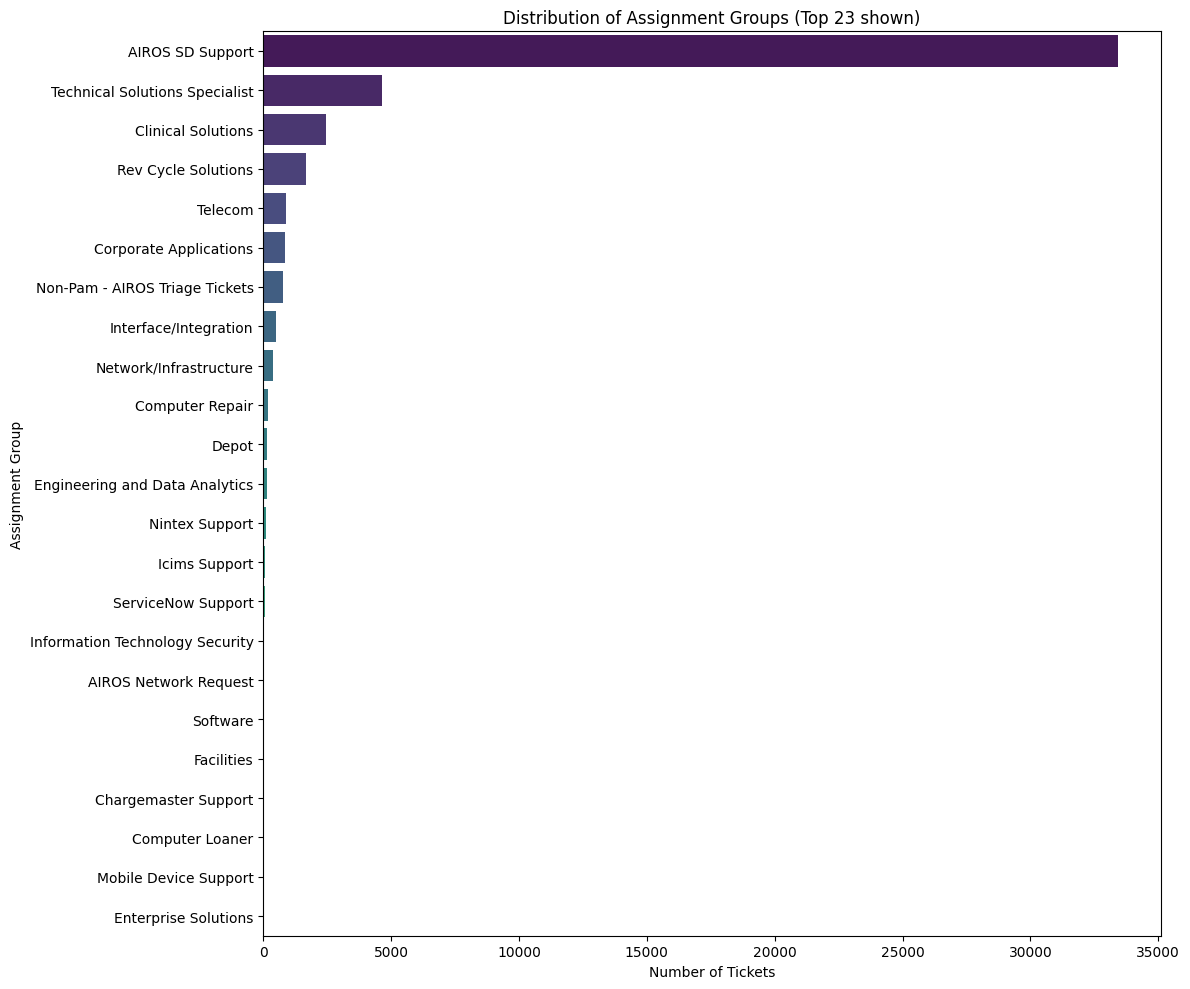


Assignment Group Value Counts:
 assignment_group
AIROS SD Support                   33438
Technical Solutions Specialist      4644
Clinical Solutions                  2449
Rev Cycle Solutions                 1663
Telecom                              872
Corporate Applications               855
Non-Pam - AIROS Triage Tickets       772
Interface/Integration                483
Network/Infrastructure               382
Computer Repair                      170
Depot                                161
Engineering and Data Analytics       130
Nintex Support                       109
Icims Support                         81
ServiceNow Support                    49
Information Technology Security       42
AIROS Network Request                 14
Software                              14
Facilities                             8
Chargemaster Support                   7
Computer Loaner                        5
Mobile Device Support                  4
Enterprise Solutions                   3
Name: c

In [10]:
# 5.1: Distribution of the Final Target: `assignment_group`

# Create a dedicated figure for this plot for better spacing
plt.figure(figsize=(12, 10)) # Adjust size as needed (width, height)
ag_counts = pam_health_cleaned_df['assignment_group'].value_counts()
sns.barplot(x=ag_counts.values, y=ag_counts.index, orient='h', palette='viridis')

plt.title(f'Distribution of Assignment Groups (Top {len(ag_counts)} shown)')
plt.xlabel('Number of Tickets')
plt.ylabel('Assignment Group')

plt.tight_layout()
plt.show()

# The value counts print statement
print("\nAssignment Group Value Counts:\n", ag_counts)


Category 1 Value Counts:
 u_category_1
AIROS API           22938
Application         13023
Service Desk         2412
Infrastructure       2356
Software             1677
Hardware             1599
Telecom               912
Security              800
Interface             464
Simplify API          172
Stolen Equipment        2
Name: count, dtype: int64


C:\Users\JennyXu\AppData\Local\Temp\ipykernel_20048\2830513079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat1_counts.values, y=cat1_counts.index, orient='h', palette='plasma')


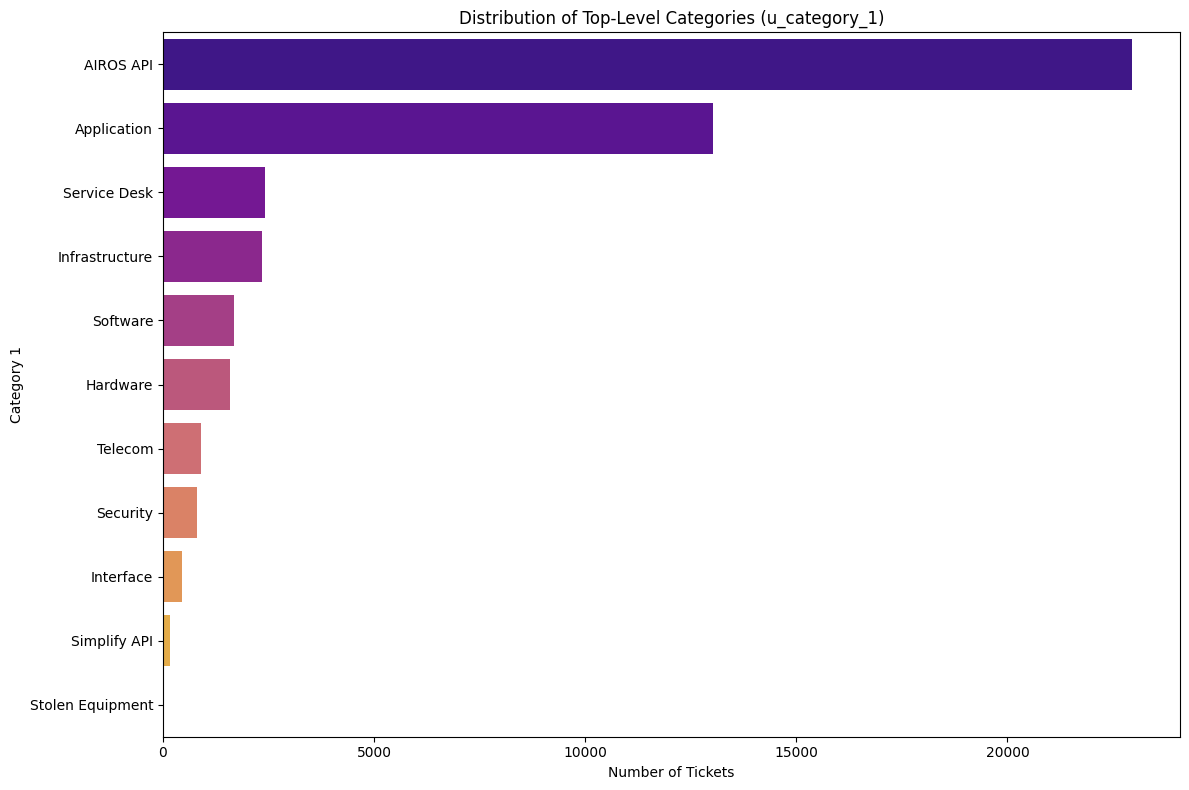

In [11]:
# 5.2: Distribution of the Intermediate Target: `u_category_1`

plt.figure(figsize=(12, 8)) # Adjust size as needed (width, height)
cat1_counts = pam_health_cleaned_df['u_category_1'].value_counts()
sns.barplot(x=cat1_counts.values, y=cat1_counts.index, orient='h', palette='plasma')

plt.title('Distribution of Top-Level Categories (u_category_1)')
plt.xlabel('Number of Tickets')
plt.ylabel('Category 1')

plt.tight_layout()
print("\nCategory 1 Value Counts:\n", cat1_counts)
plt.show()

C:\Users\JennyXu\AppData\Local\Temp\ipykernel_20048\3639071885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat2_counts.values, y=subcat2_counts.index, orient='h', palette='magma')



Top 20 Sub-Category 2 Value Counts:
 u_sub_category_2
AIROS Triage              21618
Password/Security          6229
Clinical Applications      2386
Server                     1951
Clinical                   1561
PAM Triage                 1281
Rev Cycle                  1131
Corporate Applications      943
Wellsky Specialty Care      895
Corporate Software          768
Identity Management         714
Laptop                      638
Rev Cycle Applications      548
Corporate                   515
Printer                     465
Network                     405
Deskphone                   245
Desk Phone                  235
Status - Security Req       221
OpenText                    219
Name: count, dtype: int64


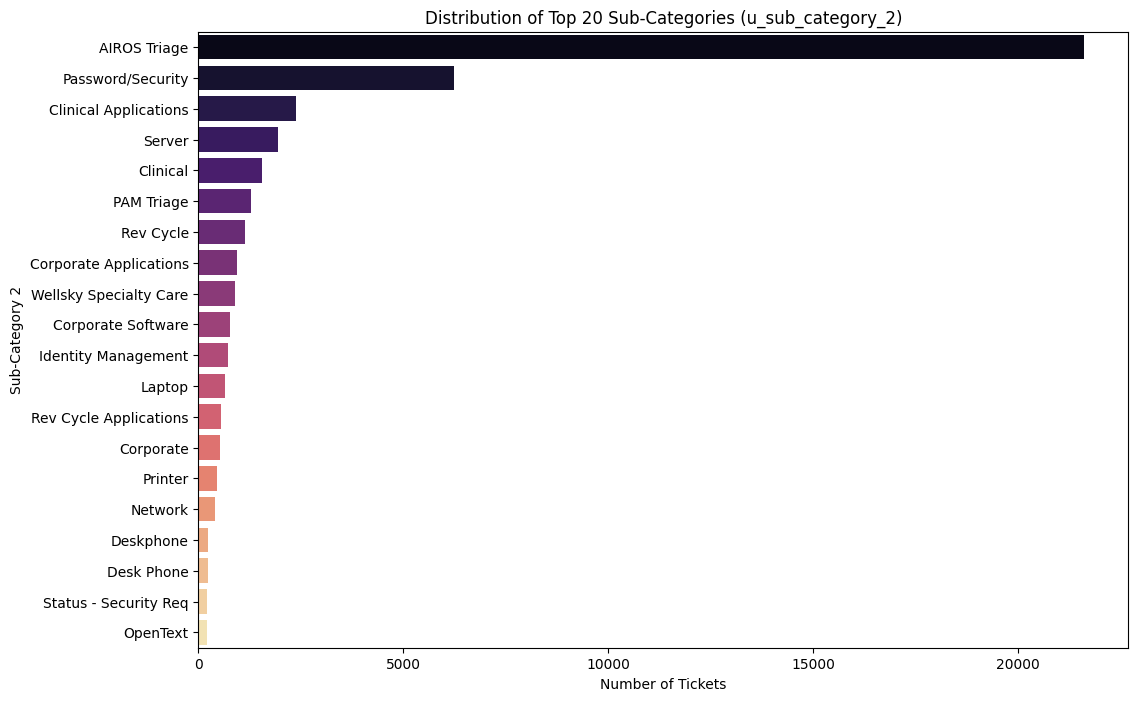

In [12]:
# 5.3: Distribution of `u_sub_category_2` (showing top 20 for readability)
plt.figure(figsize=(12, 8))
subcat2_counts = pam_health_cleaned_df['u_sub_category_2'].value_counts().nlargest(20)
sns.barplot(x=subcat2_counts.values, y=subcat2_counts.index, orient='h', palette='magma')
plt.title('Distribution of Top 20 Sub-Categories (u_sub_category_2)')
plt.xlabel('Number of Tickets')
plt.ylabel('Sub-Category 2')
print("\nTop 20 Sub-Category 2 Value Counts:\n", subcat2_counts)
plt.show()

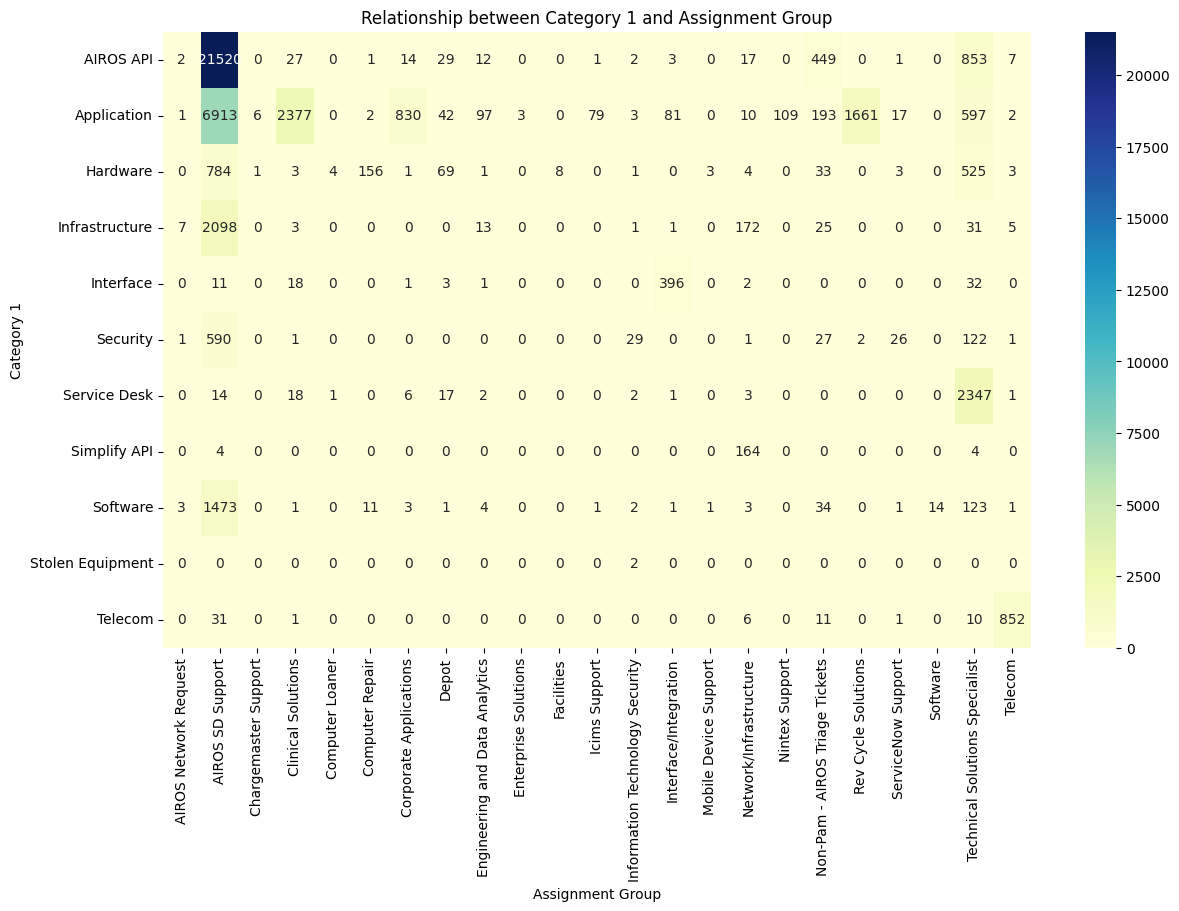

In [13]:
# 5.4: Relationship between Category 1 and Assignment Group
# A heatmap is excellent for seeing which groups handle which categories.
crosstab_cat_group = pd.crosstab(pam_health_cleaned_df['u_category_1'], pam_health_cleaned_df['assignment_group'])

plt.figure(figsize=(14, 8))
sns.heatmap(crosstab_cat_group, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relationship between Category 1 and Assignment Group')
plt.xlabel('Assignment Group')
plt.ylabel('Category 1')
plt.show()


--- Analysis 1: Top-Level Category vs. Assignment Group ---

Crosstab of Category 1 vs. Assignment Group:
assignment_group  AIROS Network Request  AIROS SD Support  \
u_category_1                                                
AIROS API                             2             21520   
Application                           1              6913   
Hardware                              0               784   
Infrastructure                        7              2098   
Interface                             0                11   
Security                              1               590   
Service Desk                          0                14   
Simplify API                          0                 4   
Software                              3              1473   
Stolen Equipment                      0                 0   
Telecom                               0                31   

assignment_group  Chargemaster Support  Clinical Solutions  Computer Loaner  \
u_category_1        

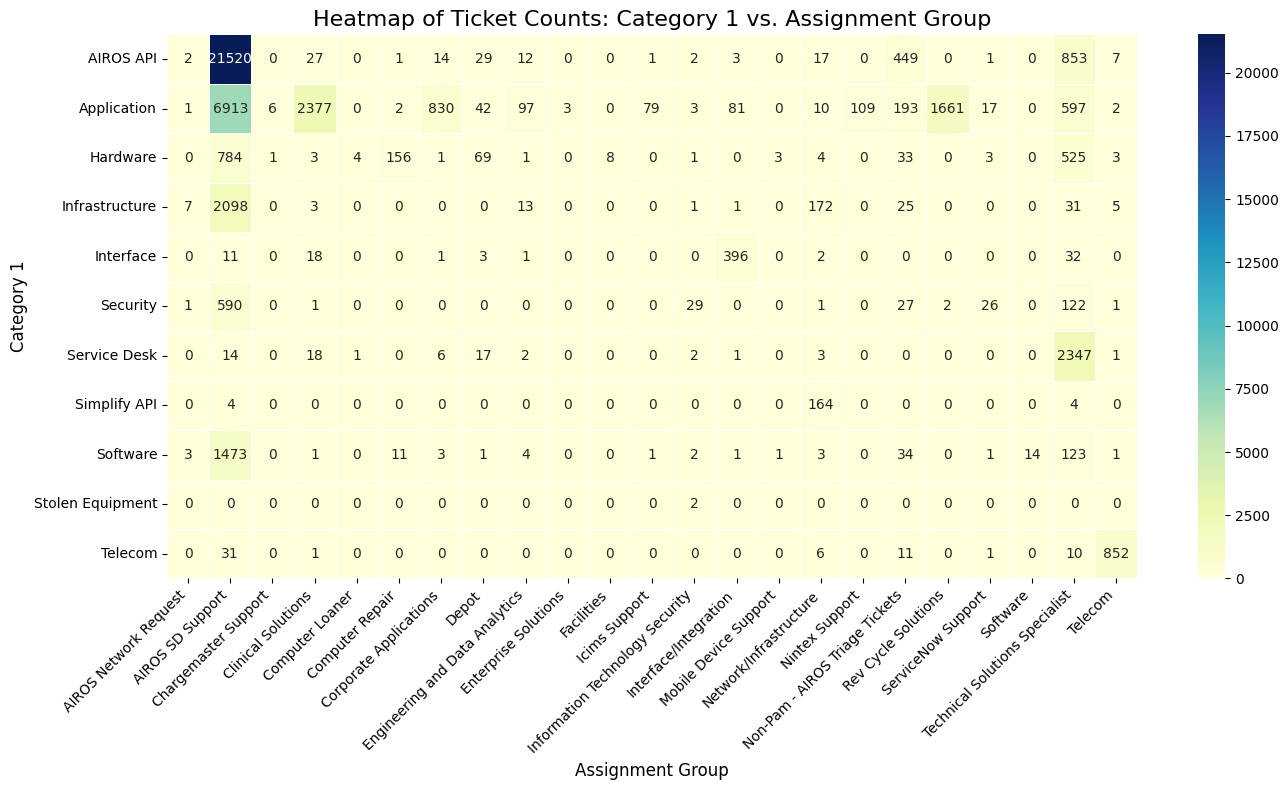


--- Analysis 2: Sub-Category vs. Assignment Group (Top 20) ---

Crosstab of Top 20 Sub-Categories vs. Assignment Group:
assignment_group        AIROS Network Request  AIROS SD Support  \
u_sub_category_2                                                  
AIROS Triage                                0             21133   
Clinical                                    1                26   
Clinical Applications                       0               923   
Corporate                                   0                 9   
Corporate Applications                      0               430   
Corporate Software                          1               681   
Desk Phone                                  0                12   
Deskphone                                   0                 0   
Identity Management                         1               550   
Laptop                                      0               237   
Network                                     0               202   
OpenText

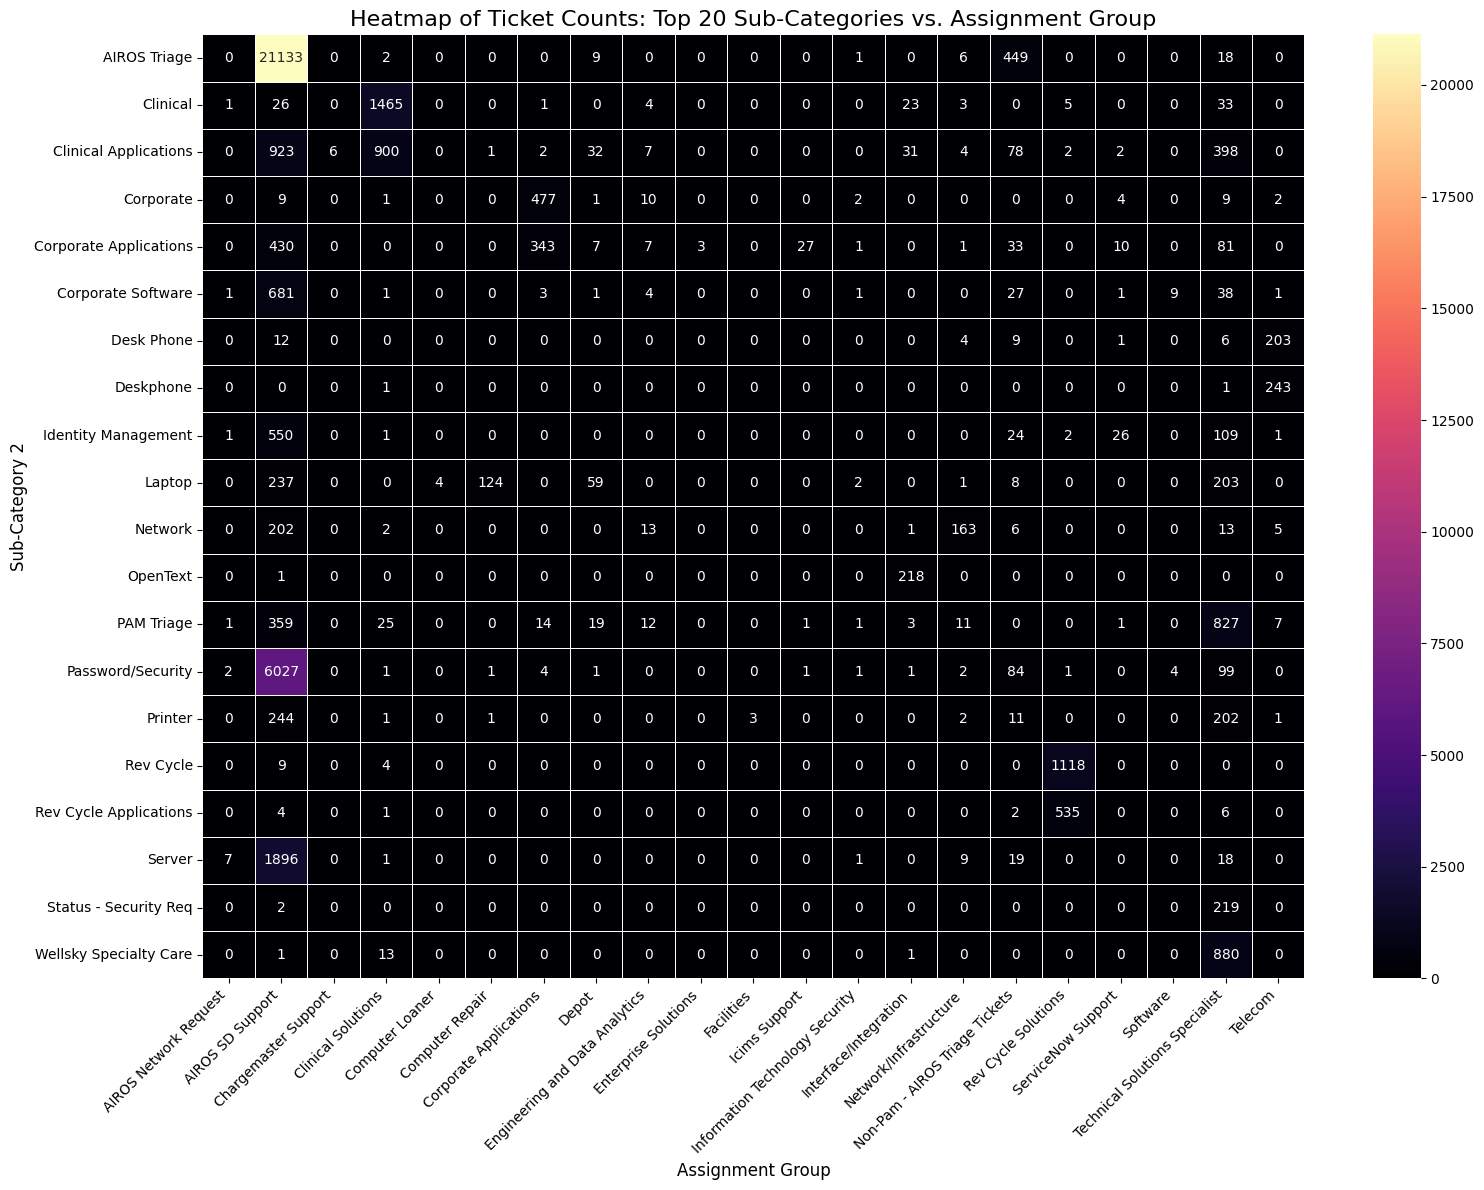


--- Analysis 3: Mapping Purity (How many groups per category?) ---
This helps identify ambiguous routing. Ideally, each category maps to only one group.

Number of Unique Assignment Groups per Top-Level Category:
        u_category_1  Unique Assignment Groups
0        Application                        19
1           Software                        17
2           Hardware                        16
3          AIROS API                        15
4       Service Desk                        11
5           Security                        10
6     Infrastructure                        10
7          Interface                         8
8            Telecom                         7
9       Simplify API                         3
10  Stolen Equipment                         1

Number of Unique Assignment Groups per Sub-Category (Top 20 shown):
          u_sub_category_2  Unique Assignment Groups
0        Password/Security                        14
1               PAM Triage                     

In [14]:
# --- 1. Analysis: Top-Level Category (u_category_1) vs. Assignment Group ---
print("\n--- Analysis 1: Top-Level Category vs. Assignment Group ---")

# Create a crosstabulation (pivot table) to count occurrences
crosstab_cat1_group = pd.crosstab(
    pam_health_cleaned_df['u_category_1'],
    pam_health_cleaned_df['assignment_group']
)

print("\nCrosstab of Category 1 vs. Assignment Group:")
print(crosstab_cat1_group)

# Visualize the crosstab as a heatmap for easy pattern recognition
plt.figure(figsize=(14, 8))
sns.heatmap(crosstab_cat1_group, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Ticket Counts: Category 1 vs. Assignment Group', fontsize=16)
plt.xlabel('Assignment Group', fontsize=12)
plt.ylabel('Category 1', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# --- 2. Analysis: Sub-Category (u_sub_category_2) vs. Assignment Group ---
print("\n--- Analysis 2: Sub-Category vs. Assignment Group (Top 20) ---")

# To keep the visualization readable, we'll focus on the most frequent sub-categories
top_sub_categories = pam_health_cleaned_df['u_sub_category_2'].value_counts().nlargest(20).index
df_filtered_subcat = pam_health_cleaned_df[pam_health_cleaned_df['u_sub_category_2'].isin(top_sub_categories)]

# Create the crosstab on the filtered data
crosstab_cat2_group = pd.crosstab(
    df_filtered_subcat['u_sub_category_2'],
    df_filtered_subcat['assignment_group']
)

print(f"\nCrosstab of Top {len(top_sub_categories)} Sub-Categories vs. Assignment Group:")
print(crosstab_cat2_group)

# Visualize the more granular relationship
plt.figure(figsize=(16, 12))
sns.heatmap(crosstab_cat2_group, annot=True, fmt='d', cmap='magma', linewidths=.5)
plt.title(f'Heatmap of Ticket Counts: Top {len(top_sub_categories)} Sub-Categories vs. Assignment Group', fontsize=16)
plt.xlabel('Assignment Group', fontsize=12)
plt.ylabel('Sub-Category 2', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# --- 3. Analysis: Mapping Purity ---
print("\n--- Analysis 3: Mapping Purity (How many groups per category?) ---")
print("This helps identify ambiguous routing. Ideally, each category maps to only one group.")

# Group by Category 1 and count unique assignment groups
cat1_purity = pam_health_cleaned_df.groupby('u_category_1')['assignment_group'].nunique().sort_values(ascending=False)
cat1_purity_df = cat1_purity.to_frame(name='Unique Assignment Groups').reset_index()

print("\nNumber of Unique Assignment Groups per Top-Level Category:")
print(cat1_purity_df)

# Group by Sub-Category 2 and count unique assignment groups
cat2_purity = pam_health_cleaned_df.groupby('u_sub_category_2')['assignment_group'].nunique().sort_values(ascending=False)
cat2_purity_df = cat2_purity.to_frame(name='Unique Assignment Groups').reset_index()

print("\nNumber of Unique Assignment Groups per Sub-Category (Top 20 shown):")
print(cat2_purity_df.head(20))

# Interpretation note:
print("\n*Interpretation Note:* Categories that map to more than one assignment group are 'ambiguous'.")
print("Your classification model will have a harder time with these and may require more specific text features to resolve them correctly.")

In [15]:
# --- 1. Analysis for Top-Level Category (u_category_1) ---
print("\n--- Most Common Group per Top-Level Category (u_category_1) ---")

# Create the crosstab
crosstab_cat1 = pd.crosstab(pam_health_cleaned_df['u_category_1'], pam_health_cleaned_df['assignment_group'])

# Find the assignment group with the maximum count for each category
# .idxmax(axis=1) returns the column label (assignment group) with the max value for each row (category)
primary_group_by_cat1 = crosstab_cat1.idxmax(axis=1)

# For a more detailed report, let's combine this with counts
report_cat1 = pd.DataFrame({
    'Most Common Assignment Group': primary_group_by_cat1,
    'Ticket Count for Group': crosstab_cat1.max(axis=1),
    'Total Tickets in Category': crosstab_cat1.sum(axis=1)
})

# Calculate the dominance percentage
report_cat1['Dominance (%)'] = round(
    100 * report_cat1['Ticket Count for Group'] / report_cat1['Total Tickets in Category'], 1
)

# Sort for readability
report_cat1.sort_values('Total Tickets in Category', ascending=False, inplace=True)

print(report_cat1)
print("\n* 'Dominance (%)' shows how often a ticket in a category is assigned to its most common group.")


# --- 2. Analysis for Sub-Category (u_sub_category_2) ---
print("\n\n--- Most Common Group per Sub-Category (u_sub_category_2) ---")

# Create the crosstab for the sub-category
crosstab_cat2 = pd.crosstab(pam_health_cleaned_df['u_sub_category_2'], pam_health_cleaned_df['assignment_group'])

# Find the primary assignment group for each sub-category
primary_group_by_cat2 = crosstab_cat2.idxmax(axis=1)

# Create the detailed report
report_cat2 = pd.DataFrame({
    'Most Common Assignment Group': primary_group_by_cat2,
    'Ticket Count for Group': crosstab_cat2.max(axis=1),
    'Total Tickets in Category': crosstab_cat2.sum(axis=1)
})

# Calculate the dominance percentage
report_cat2['Dominance (%)'] = round(
    100 * report_cat2['Ticket Count for Group'] / report_cat2['Total Tickets in Category'], 1
)

# Sort for readability
report_cat2.sort_values('Total Tickets in Category', ascending=False, inplace=True)

print(report_cat2)
print("\n* Sub-categories with high dominance (e.g., >95%) have very reliable routing and are excellent candidates for automation.")


--- Most Common Group per Top-Level Category (u_category_1) ---
                     Most Common Assignment Group  Ticket Count for Group  \
u_category_1                                                                
AIROS API                        AIROS SD Support                   21520   
Application                      AIROS SD Support                    6913   
Service Desk       Technical Solutions Specialist                    2347   
Infrastructure                   AIROS SD Support                    2098   
Software                         AIROS SD Support                    1473   
Hardware                         AIROS SD Support                     784   
Telecom                                   Telecom                     852   
Security                         AIROS SD Support                     590   
Interface                   Interface/Integration                     396   
Simplify API               Network/Infrastructure                     164   
Stolen Equi